# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import shapiro
import seaborn as sns



# for the model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.linear_model import LogisticRegression 
from xgboost import XGBClassifier

#Undersampling
from imblearn.under_sampling import RandomUnderSampler, InstanceHardnessThreshold

# Over sampling
from imblearn.over_sampling import RandomOverSampler, SMOTENC


from imblearn.over_sampling import (
    RandomOverSampler,
    SMOTENC
)

from imblearn.ensemble import (
    RUSBoostClassifier,
    EasyEnsembleClassifier,
)
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_validate

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    roc_auc_score,
    recall_score,
    f1_score,
    classification_report,
    precision_recall_fscore_support,
    confusion_matrix, 
    ConfusionMatrixDisplay)

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV,  KFold, StratifiedKFold

from sklearn.pipeline import Pipeline


# Loading data

In [2]:
pd.set_option('display.max_columns', None)
X_train = pd.read_csv('data/X_traint.csv')
X_test = pd.read_csv('data/X_test.csv')

y_train = pd.read_csv('data/y_traint.csv', index_col=0).squeeze(1)
 
y_test = pd.read_csv('data/y_test.csv',index_col=0).squeeze(1)


In [3]:
X_train.head()

,Unnamed: 0,stand__age,stand__cigsPerDay,stand__totChol,stand__BMI,stand__heartRate,stand__glucose,remainder__currentSmoker,remainder__prevalentHyp,remainder__diabetes,remainder__sysBP,remainder__diaBP,remainder__education_uneducated,remainder__education_primaryschool,remainder__education_graduate,remainder__BPMeds_0.0,remainder__Gender_Male,remainder__prevalentStroke_no
0,264,0.894112,-0.758292,-1.406496,3.030421,-0.643393,0.518596,0,1,0,6,8,1,0,0,1,1,1
1,385,-1.294345,-0.758292,-0.044397,0.347322,-1.138653,0.213034,0,0,0,3,3,0,1,0,1,1,1
2,2564,0.578919,-0.758292,-0.690817,-0.538027,-0.891023,0.387641,0,1,0,7,8,0,1,0,1,1,1
3,3787,0.015278,-0.758292,-0.783163,-0.811010,-0.313219,0.000000,0,0,0,4,1,0,0,1,1,0,1
4,4139,0.470207,-0.758292,0.348072,-0.129783,-0.065589,-0.485392,0,0,0,3,2,0,0,1,1,0,1


# Models performance 
Will check model performance with cross validation using Logistic Regression, Random Forest and XGBClassifier on orginal imbalanced data, under-sampled data, over-sampled data, using cost-sensitive learning and Ensemble techniques.
## on original data

In [4]:
# Dictionary to save results
mean = {}
std = {}

### Logistic Regression

In [5]:

logit = LogisticRegression( max_iter=1000, n_jobs=4, random_state=0)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=4)
# estimate generalization error
score =  cross_validate(
    logit,
    X_train, 
    y_train,
    scoring='roc_auc',
    return_train_score=True,
    cv=skf, # k-fold
)

In [6]:
print('mean train set roc-auc: ', np.mean(score['train_score']), ' +- ', np.std(score['train_score']))
print('mean test set roc-auc: ', np.mean(score['test_score']), ' +- ', np.std(score['test_score']))

mean train set roc-auc:  0.7296568135681238  +-  0.002541511592061921
mean test set roc-auc:  0.7180476289558686  +-  0.01460691432955568


In [7]:
mean["logit_train"] = np.mean(score['train_score'])
std["logit_train"] = np.std(score['train_score'])
mean["logit_test"] = np.mean(score['test_score'])
std["logit_test"] = np.std(score['test_score'])

### Random Forest

In [8]:
 
rf = RandomForestClassifier(random_state=0, n_jobs=4 )

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=4)
# estimate generalization error
score =  cross_validate(
    rf,
    X_train, 
    y_train,
    scoring='roc_auc',
    return_train_score=True,
    cv=skf, # k-fold
)

In [9]:
print('mean train set roc-auc: ', np.mean(score['train_score']), ' +- ', np.std(score['train_score']))
print('mean test set roc-auc: ', np.mean(score['test_score']), ' +- ', np.std(score['test_score']))

mean train set roc-auc:  1.0  +-  4.965068306494546e-17
mean test set roc-auc:  0.6628282107682856  +-  0.015809943671813226


In [10]:
mean["rf_train"] = np.mean(score['train_score'])
std["rf_train"] = np.std(score['train_score'])
mean["rf_test"] = np.mean(score['test_score'])
std["rf_test"] = np.std(score['test_score'])


### XGBClassifier

In [11]:
xgb = XGBClassifier(random_state=0, n_jobs=4)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=4)
# estimate generalization error
score =  cross_validate(
    xgb,
    X_train, 
    y_train,
    scoring='roc_auc',
    return_train_score=True,
    cv=skf, # k-fold
)

In [12]:
print('mean train set roc-auc: ', np.mean(score['train_score']), ' +- ', np.std(score['train_score']))
print('mean test set roc-auc: ', np.mean(score['test_score']), ' +- ', np.std(score['test_score']))

mean train set roc-auc:  0.9999994442221333  +-  1.1115557334129278e-06
mean test set roc-auc:  0.6221301745833581  +-  0.025535923449873255


In [13]:
mean["xgb_train"] = np.mean(score['train_score'])
std["xgb_train"] = np.std(score['train_score'])
mean["xgb_test"] = np.mean(score['test_score'])
std["xgb_test"] = np.std(score['test_score'])


In [14]:
# creating datafram
mean = pd.DataFrame.from_dict(mean, orient='index', columns=['mean'])

In [15]:
# creating datafram
std = pd.DataFrame.from_dict(std, orient='index', columns=['std'])

In [16]:
results = pd.concat([mean, std], axis=1)
results = mean.join(std)
results

,mean,std
logit_train,0.729657,2.541512e-03
logit_test,0.718048,1.460691e-02
rf_train,1.000000,4.965068e-17
rf_test,0.662828,1.580994e-02
xgb_train,0.999999,1.111556e-06
xgb_test,0.622130,2.553592e-02


There is an overfit in results obtained from Random Forest  abd XGB models. The "roc-auc" from logistic regression model is the highest with no overfit issue. Will use logistic regression in following comparsion on different sampling methods.    

## Performance on Under-sampled data
For data with categorical and contiouse features, RandomUnderSampler and InstanceHardnessThreshold can be applied

In [17]:
## Setting up Undersamplers dictionary

undersampler_dict = {

    'random': RandomUnderSampler(
        sampling_strategy='auto',
        random_state=0,
        replacement=False),

    
    'iht': InstanceHardnessThreshold(
        estimator=RandomForestClassifier(n_jobs=4, random_state=0),
        sampling_strategy='auto',
        random_state=0,
        n_jobs=4,
        cv=3)
}

In [18]:

shapes_dict = {} # store formed data shape


# store raw data shape
shapes_dict['raw_data'] = len(X_train)


# now, we test the different under-samplers, 1 at a time
for undersampler in undersampler_dict.keys():
  
 # resample the train set only
    X_resampled, y_resampled = undersampler_dict[undersampler].fit_resample(X_train, y_train)
        
        # store results
    shapes_dict[undersampler] = len(X_resampled)
    
        
shapes_dict


{'raw_data': 2966, 'random': 892, 'iht': 897}

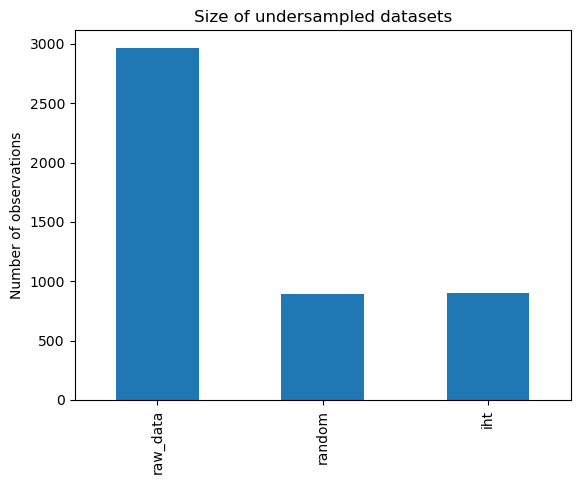

In [19]:
# plot to visually compare datasets shape.
pd.Series(shapes_dict).plot.bar()
plt.title('Size of undersampled datasets')
plt.ylabel('Number of observations')
plt.show()

### Logistic regression

In [20]:
undersampler_dict = {

    'random': RandomUnderSampler(
        sampling_strategy='auto',
        random_state=0,
        replacement=False),

    'iht': InstanceHardnessThreshold(
        estimator=LogisticRegression(max_iter=1000, n_jobs=4, random_state=0),
        sampling_strategy='auto',
        random_state=0,
        n_jobs=4,
        cv=3)
}

In [21]:
# To store all models performance
results_dict_underSamp = {}

In [22]:
# function to train random forests and evaluate the performance

def run_LogisticRegression(X_train, X_test, y_train, y_test):

    lr = LogisticRegression(random_state=0,max_iter=1000)

    lr.fit(X_train, y_train)

    print('Train set')
    pred = lr.predict_proba(X_train)
    print(
        'Logistic Regression roc-auc: {}'.format(roc_auc_score(y_train, pred[:, 1])))

    print('Test set')
    pred = lr.predict_proba(X_test)
    print(
        'Logistic Regression roc-auc: {}'.format(roc_auc_score(y_test, pred[:, 1])))
    
    # NOTE: that this function returns the ROC over the test set
    # which is the portion of the data that would not be under-sampled
    return roc_auc_score(y_test, pred[:, 1])

In [23]:
# to save the results
results_dict = {}


roc = run_LogisticRegression(X_train, X_test, y_train, y_test)

# store results
results_dict['raw_data'] = roc
    
print()

# now, we test the different under-samplers, 1 at a time
for undersampler in undersampler_dict.keys():
    print(undersampler)
 # resample the train set only
    X_resampled, y_resampled = undersampler_dict[undersampler].fit_resample(X_train, y_train)
        
        # train model and evaluate performance
        
        # Note the performance returned is using the test set, which was not under-sampled
        
    roc = run_LogisticRegression(X_resampled, X_test, y_resampled, y_test)
        
        # store results
    results_dict[undersampler] = roc
    results_dict_underSamp['Logistic Regression'] = roc 
   


    print()
     
print()   

Train set
Logistic Regression roc-auc: 0.729788597053171
Test set
Logistic Regression roc-auc: 0.7327699715967873

random
Train set
Logistic Regression roc-auc: 0.7242353556275012
Test set
Logistic Regression roc-auc: 0.7286317551680681

iht
Train set
Logistic Regression roc-auc: 0.9836463632890265
Test set
Logistic Regression roc-auc: 0.729257190151045




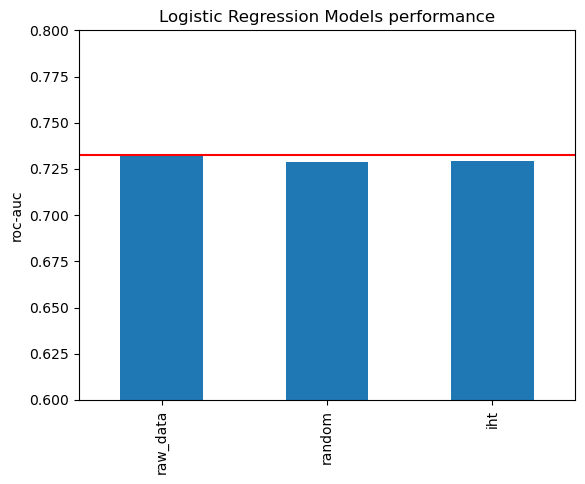

In [24]:
# Plotting the roc-auc of logistic regression on datasets obtained by undersampling

pd.Series(results_dict).plot.bar()
plt.title('Logistic Regression Models performance')
plt.ylabel('roc-auc')

plt.ylim(0.6, 0.8)
plt.axhline(results_dict['raw_data'], color='r')
plt.show()

## Performance on Over-sampled data

In [25]:
results_dict_overSamp = {}

Only oversampling metods that work on mixed  variables are RandomOverSampler and SMOTENC. For SMOTENC we need to identify categorical_features to include as argument. 

In [26]:
# identify categorical variables
cat_vars = [var for var in X_train.columns if X_train[var].nunique() <= 10]
cat_vars

['remainder__currentSmoker',
 'remainder__prevalentHyp',
 'remainder__diabetes',
 'remainder__sysBP',
 'remainder__diaBP',
 'remainder__education_uneducated',
 'remainder__education_primaryschool',
 'remainder__education_graduate',
 'remainder__BPMeds_0.0',
 'remainder__Gender_Male',
 'remainder__prevalentStroke_no']

In [27]:
cat_vars_index = [cat_vars.index(x) for x in cat_vars]
cat_vars_index

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [28]:
## Setting Oversamplers

oversampler_dict = {

    'randomOver': RandomOverSampler(
        sampling_strategy='auto',
        random_state=0),

    'smotenc': SMOTENC(
        sampling_strategy='auto',  # samples only the minority class
        random_state=0,  # for reproducibility
        k_neighbors=5,
        categorical_features = cat_vars_index,
       ),

    
}


In [29]:
# to save the results

shapes_dict = {}


# store results
shapes_dict['raw_data'] = len(X_train)


# now, we test the different under-samplers, 1 at a time
for oversampler in oversampler_dict.keys():
  
 # resample the train set only
    X_resampled, y_resampled = oversampler_dict[oversampler].fit_resample(X_train, y_train)
        
        # store results
    shapes_dict[oversampler] = len(X_resampled)
    
        
shapes_dict


{'raw_data': 2966, 'randomOver': 5040, 'smotenc': 5040}

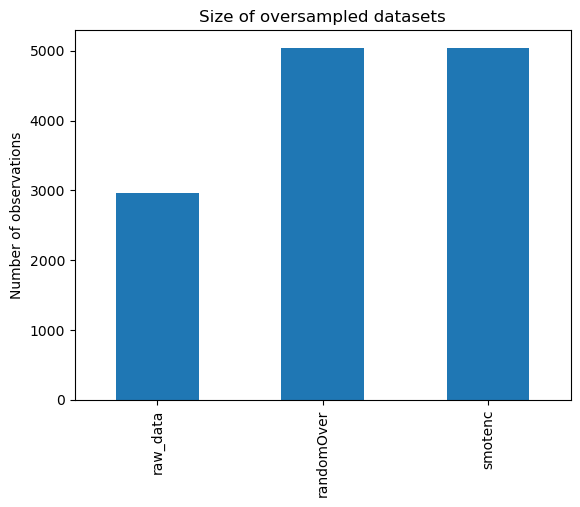

In [30]:
# plot to visually compare datasets shape.

pd.Series(shapes_dict).plot.bar()
plt.title('Size of oversampled datasets')
plt.ylabel('Number of observations')
plt.show()

## logistic regression

In [31]:
results_dict = {}
shapes_dict = {}

# train a model on the original data without under-sampling
# and determine model performance
roc = run_LogisticRegression(X_train, X_test, y_train, y_test)
    
# store results
results_dict['row_data'] = roc
shapes_dict['row_data'] = len(X_train)
    
print()

# now, we test the different under-samplers, 1 at a time
for oversampler in oversampler_dict.keys():
    print(oversampler)
 # resample the train set only
    X_resampled, y_resampled = oversampler_dict[oversampler].fit_resample(X_train, y_train)
        
        # train model and evaluate performance
        
        # Note the performance returned is using the
        # test set, which was not under-sampled
        
    roc = run_LogisticRegression(X_resampled, X_test, y_resampled, y_test)
        
#         # store results
#     results_dict['row_data'] = roc
#     shapes_dict['row_data'] = len(X_train)
  
        

    # store resultsoversampler
    results_dict[oversampler] = roc
    results_dict_overSamp['Logistic Regression'] = roc 

    print()
print()

Train set
Logistic Regression roc-auc: 0.729788597053171
Test set
Logistic Regression roc-auc: 0.7327699715967873

randomOver
Train set
Logistic Regression roc-auc: 0.7244868039808516
Test set
Logistic Regression roc-auc: 0.7299907830634088

smotenc
Train set
Logistic Regression roc-auc: 0.7436800831443688
Test set
Logistic Regression roc-auc: 0.7198803679250606




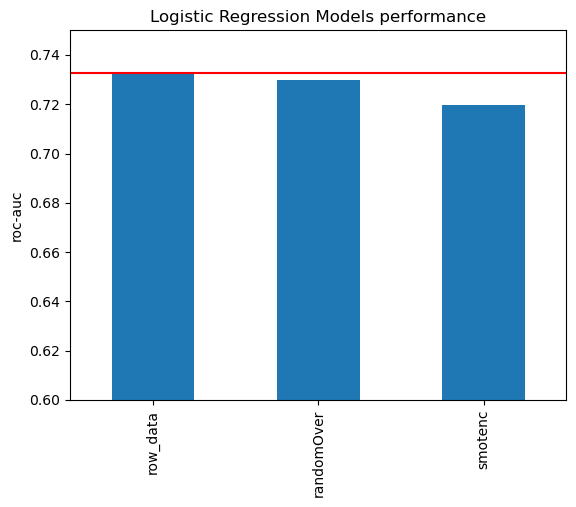

In [32]:
pd.Series(results_dict).plot.bar()
plt.title('Logistic Regression Models performance')
plt.ylabel('roc-auc')

plt.ylim(0.60, 0.75)
plt.axhline(results_dict['row_data'], color='r')
plt.show()

## Cost-sensitive learning
### Logistic Regression

In [33]:

logit = LogisticRegression(
 
    random_state=0,
    max_iter=1000,
    n_jobs=4,
    class_weight='balanced' # weights / cost
)

logit.fit(X_train, y_train)

print('Train set')
pred = logit.predict_proba(X_train)
print(
    'Logistic Regression roc-auc: {}'.format(roc_auc_score(y_train, pred[:, 1])))

print('Test set')
pred = logit.predict_proba(X_test)
print(
    'Logistic Regression roc-auc: {}'.format(roc_auc_score(y_test, pred[:, 1])))

Train set
Logistic Regression roc-auc: 0.7293027973521248
Test set
Logistic Regression roc-auc: 0.7339126836333542


In [34]:
roc_auc_score(y_test, logit.predict_proba(X_test)[:, 1])

0.7339126836333542

## Ensemble methods

### RUSBoost

In [35]:

# set up the RUSBoost ensemble model

rusboost = RUSBoostClassifier(
        estimator=DecisionTreeClassifier(max_depth=1),
        n_estimators=20,
        learning_rate=1.0,
        sampling_strategy='auto',
        random_state=0,
    )


In [36]:
# train model
rusboost.fit(X_train, y_train)

RUSBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=20, random_state=0)

In [37]:
# Now let's get the performance on train and test

X_train_preds = rusboost.predict_proba(X_train)[:,1]
X_test_preds = rusboost.predict_proba(X_test)[:,1]

print('Train roc_auc: ', roc_auc_score(y_train, X_train_preds))
print('Test roc_auc: ', roc_auc_score(y_test, X_test_preds))

Train roc_auc:  0.6739874724179657
Test roc_auc:  0.6407887064311646


### EasyEnsemble

In [38]:
easy = EasyEnsembleClassifier(
        n_estimators=10,
        sampling_strategy='auto',
        random_state=0,
    )


# train model
easy.fit(X_train, y_train)


EasyEnsembleClassifier(random_state=0)

In [39]:
# Now let's get the performance on train and test

X_train_preds = easy.predict_proba(X_train)[:,1]
X_test_preds = easy.predict_proba(X_test)[:,1]

print('Train roc_auc: ', roc_auc_score(y_train, X_train_preds))
print('Test roc_auc: ', roc_auc_score(y_test, X_test_preds))

Train roc_auc:  0.7723005196099366
Test roc_auc:  0.7047194477362076


# Hyperparameter Optimization

Comparing results obtained using defealt parameters for Logistc Regression, it seems that Logistic Regression with Random under-sampling and Cost-sensitive learning (class_weight='balanced') gave slightly better results.

Further comparsion between Logistic Regression algorithm utilizing under-sampling and Logistic Regression Cost-sensitive learning models will be done after Hyperparameter Optimization is perfomed.

## Setting GridSearchCV for orginal dataset

In [40]:
# Logistic Regression
logit = LogisticRegression(
    penalty ='l2', C=1, solver='liblinear', random_state=4, max_iter=10000)

# hyperparameter space
param_grid = dict(
    penalty=['l1', 'l2'],
    C=[10,100, 300,400,500],
)

# K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=4)

# search
clf =  GridSearchCV(
    logit,
    param_grid,
    scoring='roc_auc',
    cv=kf, # k-fold
    refit=True, # refits best model to entire dataset
)

search = clf.fit(X_train, y_train)


In [41]:

# best hyperparameters
search.best_params_

{'C': 500, 'penalty': 'l2'}

In [42]:
X_train_preds = search.predict_proba(X_train)[:,1]
X_test_preds = search.predict_proba(X_test)[:,1]


In [43]:

print('Train roc_auc: ', roc_auc_score(y_train, X_train_preds))
print('Test roc_auc: ', roc_auc_score(y_test, X_test_preds))

Train roc_auc:  0.7309648373549719
Test roc_auc:  0.7321257265391344


## GridSearchCV for Random undersampled 

In [44]:
# Under-sampling
rus = RandomUnderSampler(
    sampling_strategy='auto',  # samples only the majority class
    random_state=0,  # for reproducibility
    replacement=True # if it should resample with replacement
)  

X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

In [45]:
X_resampled.shape, y_resampled.shape

((892, 18), (892,))

In [46]:
# Logistic Regression
logit = LogisticRegression(
    penalty ='l2', C=1, solver='liblinear', random_state=4, max_iter=10000)

# hyperparameter space
param_grid = dict(
    penalty=['l1', 'l2'],
    C=[10,100, 300,400,500],
)

# K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=4)

# search
clf =  GridSearchCV(
    logit,
    param_grid,
    scoring='roc_auc',
    cv=kf, # k-fold
    refit=True, # refits best model to entire dataset
)

search = clf.fit(X_resampled, y_resampled)


In [47]:
search.best_params_

{'C': 300, 'penalty': 'l2'}

In [48]:

X_train_preds = search.predict_proba(X_resampled)[:,1]
X_test_preds = search.predict_proba(X_test)[:,1]

print('Train roc_auc: ', roc_auc_score(y_resampled, X_train_preds))
print('Test roc_auc: ', roc_auc_score(y_test, X_test_preds))

Train roc_auc:  0.756862193086529
Test roc_auc:  0.7234213644828171


## GridSearchCV for Cost-sensitive learning 

In [49]:
# Logistic Regression
logit = LogisticRegression(
    penalty ='l2', C=1, solver='liblinear', random_state=4, max_iter=10000,class_weight='balanced' )

# hyperparameter space
param_grid = dict(
    penalty=['l1', 'l2'],
    C=[10,100, 300,400,500],
)

# K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=4)

# search
clf =  GridSearchCV(
    logit,
    param_grid,
    scoring='roc_auc',
    cv=kf, # k-fold
    refit=True, # refits best model to entire dataset
)

search = clf.fit(X_train, y_train)


In [50]:
# best hyperparameters
search.best_params_

{'C': 10, 'penalty': 'l2'}

In [51]:
X_train_preds = search.predict_proba(X_train)[:,1]
X_test_preds = search.predict_proba(X_test)[:,1]



print('Train roc_auc: ', roc_auc_score(y_train, X_train_preds))
print('Test roc_auc: ', roc_auc_score(y_test, X_test_preds))

Train roc_auc:  0.7320556623247206
Test roc_auc:  0.7310911724319547


Both  Under-sampling andCost-sensitive learning do not show any improvement compared with results obtained from orginal data